# Exploring Employee Exit Surveys

## Introduction
> Although it is more common for an employee to get fired, many employees also resign from their postings. People resign on many grounds, from having personal reasons to misconduct in the workplace. The focus of the project will be geared towards exploring ex-employees who have resigned from their jobs due to being dissatisfied. The aim of this project is  to answer the following questions:
> - Are short-term employees resigning due to some kind of dissatisfaction? How about long-term employees?
> - Are younger employees resigning due to some kind of dissatisfaction? How about older employees?

> In order to answer the above questions, we will need to extract information from two datasets. For this reason, the focus of this project will be on combining, cleaning, and preparing to ensure a unified and coherent combined dataset. Towards the end of the notebook, we will answer the above questions. The first part of this notebook will focus on preparing, cleaning, and combining the datasets, while the second part will center on answering the above questions.

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading in the datasets, converting "Not Stated" values in the DETE dataset to NaN values
dete_survey = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Clean and Analyze Employee Exit Surveys/dete_survey.csv", encoding = "UTF-8", na_values = "Not Stated")
tafe_survey = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Clean and Analyze Employee Exit Surveys/tafe_survey.csv", encoding = "Windows-1251")

In [3]:
print(dete_survey.info())
display(dete_survey.head())
dete_survey["Cease Date"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
08/2012      2
04/2013      2
04/2014      2
07/2014      2
02/2014      2
2010         1
07/2006      1
11/2012      1
09/2010      1
2014         1
09/2014      1
07/2012      1
Name: Cease Date, dtype: int64

> Before we clean, prepare, and analyze the data, lets us take a brief look at a summary of the "dete_survey" dataset. The dataset has 56 columns, most of which we will not use. We have the records of 822 ex-employees. The last few columns are populated with many null values - columns that will probably also drop. The columns seem to be assigned the correct datatypes apart from the date-related columns which should be converted to the datetime datatype. Columns 10 to 27 all seem to be answer options to a question regarding the reason for leaving the DETE institute. These columns have a bool datatype, meaning the method of answering is of the form "select which applies to you". The columns we are interested in are "ID", "SeperationType", "Cease Date", "DETE Start Date", "Role Start", "Position", "Region", "Employment Status", "Gender", "Age", and all the answer columns regarding job dissatisfaction. These columns all seem to be relevant in answering the questions at hand. Of the selected columns, "Cease Date" has formatting issues. The dates are in the format YEAR and MONTH/YEAR, meaning we’ll have to decide on a unified format for all the values.

In [4]:
print(tafe_survey.info())
tafe_survey.head()
tafe_survey["WorkArea"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64

> Similar to the  "dete_survey", the "tafe_survey" is also populated with many columns that will not help us answer our questions. Columns 17 to 66 represent answers to questions that are either redundant or are useless to our analysis. The "question" columns that we will need are columns 5 to 16, which help us identify the reason for an ex-employees resignation. It seems like the columns have been assigned the correct data type. The columns that we are interested in are: "Record ID","Institute","WorkArea","CESSATION YEAR","Reason for ceasing employment","Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction","Gender","Age","Employment Type","LengthofServiceOverall...". Exploring a little further into our selected columns, we see that the format of values in "Record ID" are in scientific notation. This shouldn't be an issue as we are mostly using this column to uniquely identify ex-employees. There are only two unique values in the "WorkArea" column - ex-employees either worked in corporate roles or teaching roles. The "Age" columns are measured in intervals. The "Length of Service" column is also measured in intervals.

## Part 1: Cleaning and Preparing The Data

In [5]:
# Dropping columns that we don't need from both DataFrames
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [6]:
# Renaming the columns in both dataframes for better readability and accessability
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ", "_").str.strip()
dete_survey_updated.rename({"separationtype":"separation_type"}, axis = 1, inplace = True)

tafe_column_names_dict = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separation_type',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service', 
}

tafe_survey_updated.rename(tafe_column_names_dict, axis = 1, inplace = True)

In [7]:
# Selecting only the rows where 'separation_type' = "Resignation" in both datasets
dete_resignations = dete_survey_updated[dete_survey_updated["separation_type"].str.contains("Resignation")]
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separation_type"] == "Resignation"]

> In this analysis, we are only interested in employees who resigned from their roles at their respective institutes, which is why we are filtering for employees who resigned.

In [8]:
# Cleaning and reformatting the "cease_date" column
pattern = r"([2][0-9]{3})"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(pattern).astype("float")

> We are cleaning the "cease_date" column of the dete_survey dataset so that we can perform mathematical operations on it and later calculate the number of years ex-employees worked at the institute.

In [9]:
# Creating new "institute_service" column
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

> We are now calculating the number of years an ex-employee has worked at the DETE institute.

In [10]:
# we are going to conver the values in columns "Contributing Factors. Dissatisfaction" & "Contributing Factors. Job Dissatisfaction" to True/Flase/NaN values
def update_vals(element):
    if element == "-":
        return False
    if pd.isnull(element):
        return np.nan
    else:
        return True
    
tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]] = tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

> Converting the values in the "Contributing Factors. Dissatisfaction" & Contributing Factors. Job Dissatisfaction" to True/False values for an easier deduction of whether an employee was dissatisfied or not.

In [11]:
# Creating a value_counts function
def dfvalue_counts(data, col_list):
    dataframe = pd.DataFrame()
    for col in col_list:
        dataframe[col] = data[col].value_counts()
        
    return dataframe

dfvalue_counts(tafe_resignations, ["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"])

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
False,277,270
True,55,62


> Quickly exploring how many people were simply just "dissatisfied" and how many were dissatisfied with their job. Either way, for the purpose of this analysis, if an employee answers true for any of these options, he/she will be considered "dissatisfied".

In [12]:
# Creating a "dissatisfied" column for both datasets
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location","employment_conditions","work_life_balance","workload"]].any(axis = 1, skipna = False)
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].any(axis = 1, skipna = False)

> Categorizing an ex-employee as either dissatisfied or not with boolean values. True = dissatisfied, False = not dissatisfied.

In [13]:
# Creating new columns in each dataset so that we we can distinguish between 
dete_resignations["institute"] = "DETE"
tafe_resignations["institute"] = "TAFE"

> Creating an "Institute" column to distinguish between the employees of each institute.

In [14]:
# Combining both datasets together
combined = pd.concat([dete_resignations, tafe_resignations])

In [15]:
# Removing columns that have less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 1)

> Columns with less than 500 non-null values are deemed invaluable as we won’t be able to derive any insights from them.

In [16]:
combined_updated["institute_service"] = combined_updated["institute_service"].replace("NaN", np.nan)

In [17]:
# Cleaning the "institute_service" column of the combined dataset
def midpoint(element):
    if "-" in str(element):
        split = str(element).split("-")
        midpoint = round((int(split[0]) + int(split[1]) / 2))
        return midpoint
    elif element == "Less than 1 year":
        return 0
    elif element == "More than 20 years":
        return 21
    else:
        return element
        
combined_updated["institute_service"] = combined_updated["institute_service"].apply(midpoint)

> There are a number of different formats for the values in the "institute_service" column. The function unifies the format and outputs integers. we have also decided to recognize 0 years as a length of working experience. It represents the couple of months an employee had worked at their respective institutes. We have decided to use the midway point as the number of years a person has worked at his/her respective institue as it will allow us to perform calculations on the column later. We have also decided to assign those who had more than 20 years of experience 21 years. This was done because it will make it possible to perform operations on the column. Assigning such employees a tenure of 21, even if they worked for more years will not affect our results, since we will be placing employees into tenure buckets in the coming cells. And those who serviced for 11 years or more will be categorized as "veterans".

In [18]:
# Cleaning the Age column
def age_converter(element):
    if "-" in str(element):
        split = str(element).split("-")
        midpoint = round((int(split[0]) + int(split[1]) / 2))
        return midpoint
    elif "younger" in str(element) or "older" in str(element):
        return element.split(" ")[0]
    elif "  " in str(element):
        split = str(element).split("  ")
        midpoint = round((int(split[0]) + int(split[1]) / 2))
        return midpoint
    else:
        return element

combined_updated["age"] = combined_updated["age"].apply(age_converter)
combined_updated["age"] = pd.to_numeric(combined_updated["age"])

> We are cleaning the "age" column. As we did before, for values that were age intervals, we calculated the midway point as it allows to perform mathematical operations on the column.

In [19]:
# Categorizing the values in the "institute_service" as either new, experienced, established, or veteran depending the employees years fo service
def experience_level(element):
    if pd.isnull(element):
        return element
    elif int(element) < 3:
        return "new"
    elif int(element) >= 3 and int(element) <= 6:
        return "experienced"
    elif int(element) >= 7 and int(element) <= 10:
        return "established"
    elif int(element) >= 11:
        return "veteran"

combined_updated["institute_service"] = combined_updated["institute_service"].apply(experience_level)

> We are creating buckets representing an ex-employees tenure. The following criteria are applied to each ex-employee to categorize them into their respective bucket. new - less than 3 years, experienced - less than or equal to 6 years, established - less than or equal to 10 years, veteran - more than or equal to 11 years.

In [20]:
combined_updated["institute_service"].value_counts(dropna = False)

new            193
veteran        157
experienced    139
NaN             88
established     74
Name: institute_service, dtype: int64

## Part 2: Analyzing The Data

In [21]:
# Calculating the proprtions of dissatisfied ex-employees for each experince bucket
combined_updated["dissatisfied"].fillna(False, inplace = True)
pivot_table_service = combined_updated.pivot_table("dissatisfied", "institute_service", aggfunc = np.mean)
pivot_table_service

,dissatisfied
institute_service,
established,0.459459
experienced,0.359712
new,0.295337
veteran,0.464968


<AxesSubplot:xlabel='institute_service'>

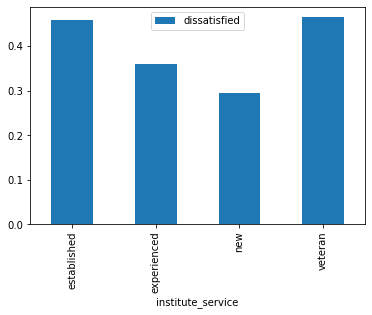

In [22]:
pivot_table_service.plot(kind = "bar")

In [23]:
pivot_table_age = combined_updated.pivot_table("dissatisfied", "age", aggfunc = np.mean)
pivot_table_age = pivot_table_age.sort_index()

<AxesSubplot:xlabel='age'>

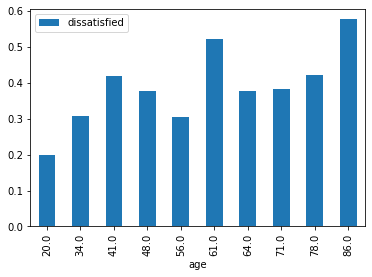

In [24]:
pivot_table_age.plot(kind = "bar")

## Conclusion
> The main focus of this project was combining two datasets. To do so, we had to pre-clean both datasets before combining them to ensure they would be aligned with each other. The Majority of the cleaning process was centered on reformating the values of columns and assigning them the correct data types. Much of this reformating was done to allow us to perform mathematical operations on the columns for later analysis. Although this project did not analyze much of the data, we were able to gain some insights into why some employees resigned from their respective institutions. We conclude that more tenured ex-employees resigned more often than those who were still new or relatively new to their job. Almost 50% of "veteran" and "established" ex-employees resigned after working for such long periods as compared to 30% and 35% for "new" and "experienced" ex-employees. This result seems reasonable as naturally, the longer you stay working the same job, the more monotonous and dissatisfied you become and try to seek other challenges. These findings are consistent with the age at which ex-employees resign from their job. People who are older tend to resign compared to younger employees.

In [25]:
%%html
<style>
.nbviewer div.output_area {
  overflow-y: auto;
  max-height: 400px;
}
</style>